In [47]:
from glob import glob
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem
import dabest

import matplotlib.pyplot as plt

from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

%matplotlib inline

/Users/kevinmaikjablonka/miniconda3/envs/chemlift/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
all_res = glob('results/*.pkl')

In [49]:
compiled_results = []

for res in all_res:
    res = load_pickle(res)
    summary = {
        'acc_macro': res['acc_macro'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_support_samples': res['num_support_samples'],
        'model': res['model'],
        'temperature': res['temperature'],
        'strategy': res['strategy'],
    }
    compiled_results.append(summary)

In [50]:
res

{'accuracy': 0.56,
 'acc_macro': 0.56,
 'racc': 0.5,
 'kappa': 0.1200000000000001,
 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]),
 'roc_auc': 0.56,
 'f1_macro': 0.45436507936507936,
 'f1_micro': 0.56,
 'frac_valid': 1.0,
 'all_y_true': (#50) [0,1,1,0,1,0,1,1,0,0...],
 'all_y_pred': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'valid_indices': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 'might_have_rounded_floats': False,
 'num_support_samples': 10,
 'strategy': 'diverse',
 'model': 'claude-instant-1',
 'num_test_points': 50,
 'r

In [70]:
df = pd.DataFrame(compiled_results)

In [71]:
aggregated = df.groupby(['model','temperature',  'strategy', 'num_support_samples']).agg(['mean', sem, 'std', 'count']).sort_values(('f1_macro', 'mean'), ascending=False)

/Users/kevinmaikjablonka/miniconda3/envs/chemlift/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/chemlift/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/chemlift/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/chemlift/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/chemlift/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = 

In [72]:
aggregated

acc_macro            \
                                                               mean       sem   
model            temperature strategy num_support_samples                       
gpt-4            0.8         diverse  100                  0.813333  0.018379   
                 0.2         diverse  100                  0.806667  0.021705   
                 0.8         random   100                  0.776667  0.022755   
                 0.2         random   100                  0.763333  0.018196   
                                      50                   0.737778  0.018088   
...                                                             ...       ...   
claude-instant-1 0.2         diverse  20                   0.526619  0.020466   
text-davinci-003 0.2         random   20                   0.493333  0.015202   
text-ada-001     0.2         random   5                    0.522874  0.028409   
text-davinci-003 0.2         random   5                    0.501818  0.010844   
claude-2         0.2         random   5                    0.516667  0.013081   

                                                                           \
                                                                std count   
model            temperature strategy num_support_samples                   
gpt-4            0.8         diverse  100                  0.045019     6   
                 0.2         diverse  100                  0.053166     6   
                 0.8         random   100                  0.055737     6   
                 0.2         random   100                  0.044572     6   
                                      50                   0.054263     9   
...                                                             ...   ...   
claude-instant-1 0.2         diverse  20                   0.050132     6   
text-davinci-003 0.2         random   20                   0.069666    21   
text-ada-001     0.2         random   5                    0.056818     4   
text-davinci-003 0.2         random   5                    0.050863    22   
claude-2         0.2         random   5                    0.032042     6   

                                                           f1_macro            \
                                                               mean       sem   
model            temperature strategy num_support_samples                       
gpt-4            0.8         diverse  100                  0.812185  0.018490   
                 0.2         diverse  100                  0.804166  0.022190   
                 0.8         random   100                  0.768329  0.025475   
                 0.2         random   100                  0.751580  0.023022   
                                      50                   0.721933  0.023879   
...                                                             ...       ...   
claude-instant-1 0.2         diverse  20                   0.431910  0.032654   
text-davinci-003 0.2         random   20                   0.427014  0.016019   
text-ada-001     0.2         random   5                    0.414570  0.020575   
text-davinci-003 0.2         random   5                    0.413351  0.016146   
claude-2         0.2         random   5                    0.401366  0.031696   

                                                                           \
                                                                std count   
model            temperature strategy num_support_samples                   
gpt-4            0.8         diverse  100                  0.045292     6   
                 0.2         diverse  100                  0.054354     6   
                 0.8         random   100                  0.062401     6   
                 0.2         random   100                  0.056392     6   
                                      50                   0.071638     9   
...                                                             ...   ...   
claude-instant-1

In [73]:
differences = []

metrics = 'f1_macro'
for model in df['model'].unique(): 
    for temperature in df['temperature'].unique(): 

        for num_support_samples in df['num_support_samples'].unique():
            subset = df.query(f'model == "{model}" and temperature == {temperature} and num_support_samples == {num_support_samples}')

            diverse_res = subset.query('strategy == "diverse"')
            random_res = subset.query('strategy == "random"')

            differences.append({
                'random': random_res[metrics].mean(),
                'diverse': diverse_res[metrics].mean(),
                'model': model,
                'temperature': temperature,
                'num_support_samples': num_support_samples,  
            })

In [74]:
differences = pd.DataFrame(differences)

In [75]:
differences

,random,diverse,model,temperature,num_support_samples
0,0.467846,NaN,gpt-3.5-turbo,0.8,5
1,0.541575,NaN,gpt-3.5-turbo,0.8,100
2,0.524538,NaN,gpt-3.5-turbo,0.8,20
3,0.519985,NaN,gpt-3.5-turbo,0.8,10
4,0.508387,NaN,gpt-3.5-turbo,0.8,50
5,0.445453,NaN,gpt-3.5-turbo,0.2,5
6,0.549613,NaN,gpt-3.5-turbo,0.2,100
7,0.493340,NaN,gpt-3.5-turbo,0.2,20
8,0.486977,NaN,gpt-3.5-turbo,0.2,10
9,0.530513,NaN,gpt-3.5-turbo,0.2,50


# Random low temperature

In [84]:
random_low_temp = df.query('temperature == 0.2 and strategy == "random"')

In [85]:
random_low_temp

,acc_macro,f1_macro,f1_micro,kappa,num_support_samples,model,temperature,strategy
2,0.78,0.775602,0.78,0.56,100,gpt-4,0.2,random
3,0.50,0.333333,0.50,0.00,5,gpt-3.5-turbo,0.2,random
4,0.56,0.548440,0.56,0.12,20,text-davinci-003,0.2,random
11,0.52,0.376299,0.52,0.04,5,text-davinci-003,0.2,random
15,0.28,0.280000,0.28,-0.44,10,text-davinci-003,0.2,random
...,...,...,...,...,...,...,...,...
724,0.70,0.684741,0.70,0.40,50,gpt-3.5-turbo,0.2,random
725,0.50,0.499800,0.50,0.00,5,claude-instant-1,0.2,random
726,0.58,0.575758,0.58,0.16,10,gpt-3.5-turbo,0.2,random
727,0.50,0.333333,0.50,0.00,5,claude-2,0.2,random


In [86]:
random_low_temp = random_low_temp.groupby(['model', 'temperature', 'num_support_samples']).agg(['mean', sem, 'std', 'count']).sort_values(('f1_macro', 'mean'), ascending=False)

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_2652/2342559592.py:1: FutureWarning: ['strategy'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  random_low_temp = random_low_temp.groupby(['model', 'temperature', 'num_support_samples']).agg(['mean', sem, 'std', 'count']).sort_values(('f1_macro', 'mean'), ascending=False)


In [87]:
random_low_temp

acc_macro            \
                                                      mean       sem   
model            temperature num_support_samples                       
gpt-4            0.2         100                  0.763333  0.018196   
                             50                   0.737778  0.018088   
                             20                   0.666667  0.029059   
claude-instant-1 0.2         50                   0.632000  0.050040   
claude-2         0.2         50                   0.610000  0.050000   
gpt-4            0.2         10                   0.611111  0.032165   
claude-2         0.2         100                  0.586667  0.054569   
gpt-3.5-turbo    0.2         100                  0.573333  0.019354   
text-ada-001     0.2         10                   0.555882  0.144118   
claude-2         0.2         20                   0.550000  0.050000   
claude-instant-1 0.2         100                  0.582367  0.026184   
gpt-3.5-turbo    0.2         50                   0.556667  0.018171   
claude-2         0.2         10                   0.515000  0.017078   
text-davinci-003 0.2         50                   0.551000  0.022825   
gpt-3.5-turbo    0.2         20                   0.528000  0.012958   
                             10                   0.536667  0.014063   
claude-instant-1 0.2         10                   0.526667  0.019090   
                             20                   0.530000  0.018439   
text-davinci-003 0.2         10                   0.510370  0.018807   
claude-instant-1 0.2         5                    0.537778  0.013922   
gpt-4            0.2         5                    0.533333  0.021602   
gpt-3.5-turbo    0.2         5                    0.516000  0.008046   
text-ada-001     0.2         20                   0.524413  0.072296   
text-davinci-003 0.2         20                   0.493333  0.015202   
text-ada-001     0.2         5                    0.522874  0.028409   
text-davinci-003 0.2         5                    0.501818  0.010844   
claude-2         0.2         5                    0.516667  0.013081   

                                                                  f1_macro  \
                                                       std count      mean   
model            temperature num_support_samples                             
gpt-4            0.2         100                  0.044572     6  0.751580   
                             50                   0.054263     9  0.721933   
                             20                   0.087178     9  0.630447   
claude-instant-1 0.2         50                   0.111893     5  0.609973   
claude-2         0.2         50                   0.070711     2  0.602890   
gpt-4            0.2         10                   0.096494     9  0.588173   
claude-2         0.2         100                  0.094516     3  0.572401   
gpt-3.5-turbo    0.2         100                  0.106004    30  0.549613   
text-ada-001     0.2         10                   0.203813     2  0.548611   
claude-2         0.2         20                   0.070711     2  0.545002   
claude-instant-1 0.2         100                  0.058549     5  0.540464   
gpt-3.5-turbo    0.2         50                   0.099528    30  0.530513   
claude-2         0.2         10                   0.034157     4  0.500668   
text-davinci-003 0.2         50                   0.102078    20  0.496884   
gpt-3.5-turbo    0.2         20                   0.070974    30  0.493340   
                             10                   0.077028    30  0.486977   
claude-instant-1 0.2         10                   0.046762     6  0.484472   
                             20                   0.045166     6  0.475401   
text-davinci-003 0.2         10                   0.097723    27  0.465876   
claude-instant-1 0.2         5                    0.041767     9  0.457298   
gpt-4            0.2         5                    0.064807     9  0.454896   
gpt-3.5-turbo   

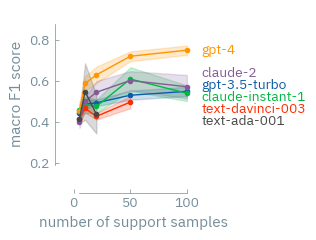

In [109]:
fig, ax = plt.subplots()

for i, model in enumerate(df['model'].unique()):
    subset = random_low_temp.query(f'model == "{model}"')
    subset = subset.reset_index()
    subset = subset.sort_values('num_support_samples')
    ax.plot(subset['num_support_samples'], subset[('f1_macro', 'mean')], label=model, color=f"C{i}",
                    marker='o')
    ax.fill_between(subset['num_support_samples'], subset[('f1_macro', 'mean')] - subset[('f1_macro', 'sem')], 
                    subset[('f1_macro', 'mean')] + subset[('f1_macro', 'sem')], alpha=0.2, color=f"C{i}")

range_frame(ax, 
            np.array([5, 100]),
            np.array([df['f1_macro'].min(), df['f1_macro'].max()]),
            )

ax.set_xlabel('number of support samples')
ax.set_ylabel('macro F1 score')


matplotx.line_labels(ax)
fig.tight_layout()

fig.savefig('icl_t02_random_sampling.pdf',bbox_inches='tight')

### Random high temp

In [110]:
random_high_temp = df.query('temperature == 0.8 and strategy == "random"')

In [111]:
random_high_temp = random_high_temp.groupby(['model', 'num_support_samples']).agg(['mean', sem, 'std', 'count']).sort_values(('f1_macro', 'mean'), ascending=False)

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_2652/3153245902.py:1: FutureWarning: ['strategy'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  random_high_temp = random_high_temp.groupby(['model', 'num_support_samples']).agg(['mean', sem, 'std', 'count']).sort_values(('f1_macro', 'mean'), ascending=False)


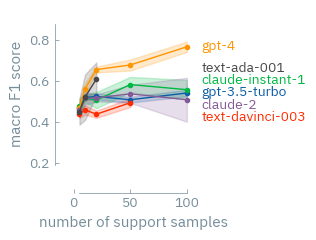

In [113]:
fig, ax = plt.subplots()

for i, model in enumerate(df['model'].unique()):
    subset = random_high_temp.query(f'model == "{model}"')
    subset = subset.reset_index()
    subset = subset.sort_values('num_support_samples')
    ax.plot(subset['num_support_samples'], subset[('f1_macro', 'mean')], label=model, color=f"C{i}",
                    marker='o')
    ax.fill_between(subset['num_support_samples'], subset[('f1_macro', 'mean')] - subset[('f1_macro', 'sem')], 
                    subset[('f1_macro', 'mean')] + subset[('f1_macro', 'sem')], alpha=0.2, color=f"C{i}")

range_frame(ax, 
            np.array([5, 100]),
            np.array([df['f1_macro'].min(), df['f1_macro'].max()]),
            )

ax.set_xlabel('number of support samples')
ax.set_ylabel('macro F1 score')


matplotx.line_labels(ax)
fig.tight_layout()

fig.savefig('icl_t08_random_sampling.pdf',bbox_inches='tight')